<a href="https://colab.research.google.com/github/MickaelUFSC/visualDetection/blob/main/custom_dataset_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar a YOLO

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 13.4 MB/s eta 0:00:00


Importar o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importa as bibliotecas

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

Modelo pré treinado para auxiliar o treinamento customizado

In [ ]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 357MB/s]


Treinamento - passe o diretorio do arquivo yaml, a quantidade de epochs, o tamanho desejado de imagem e o tamanho de batch. Importante: O arquivo yaml deve contar o diretorio de train e val que será utilizado no treinamento.

In [ ]:
model.train(data = "/content/drive/MyDrive/ppe_contents/data_custom.yaml", epochs = 100, imgsz = 640, batch = 32)

Criando o modelo de detecção, passe o diretorio do arquivo gerado pelo model.train

In [ ]:
infer = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
infer = YOLO("/content/drive/MyDrive/ppe_contents/images_micka/yolotrain.pt")

Predição da imagem/Video

In [ ]:
infer.predict("/content/drive/MyDrive/ppe_contents/images_micka/train/images/Image_1.jpg", save=True, line_width=4, conf=0.5, save_txt=True, show_labels=True, show_conf=True)

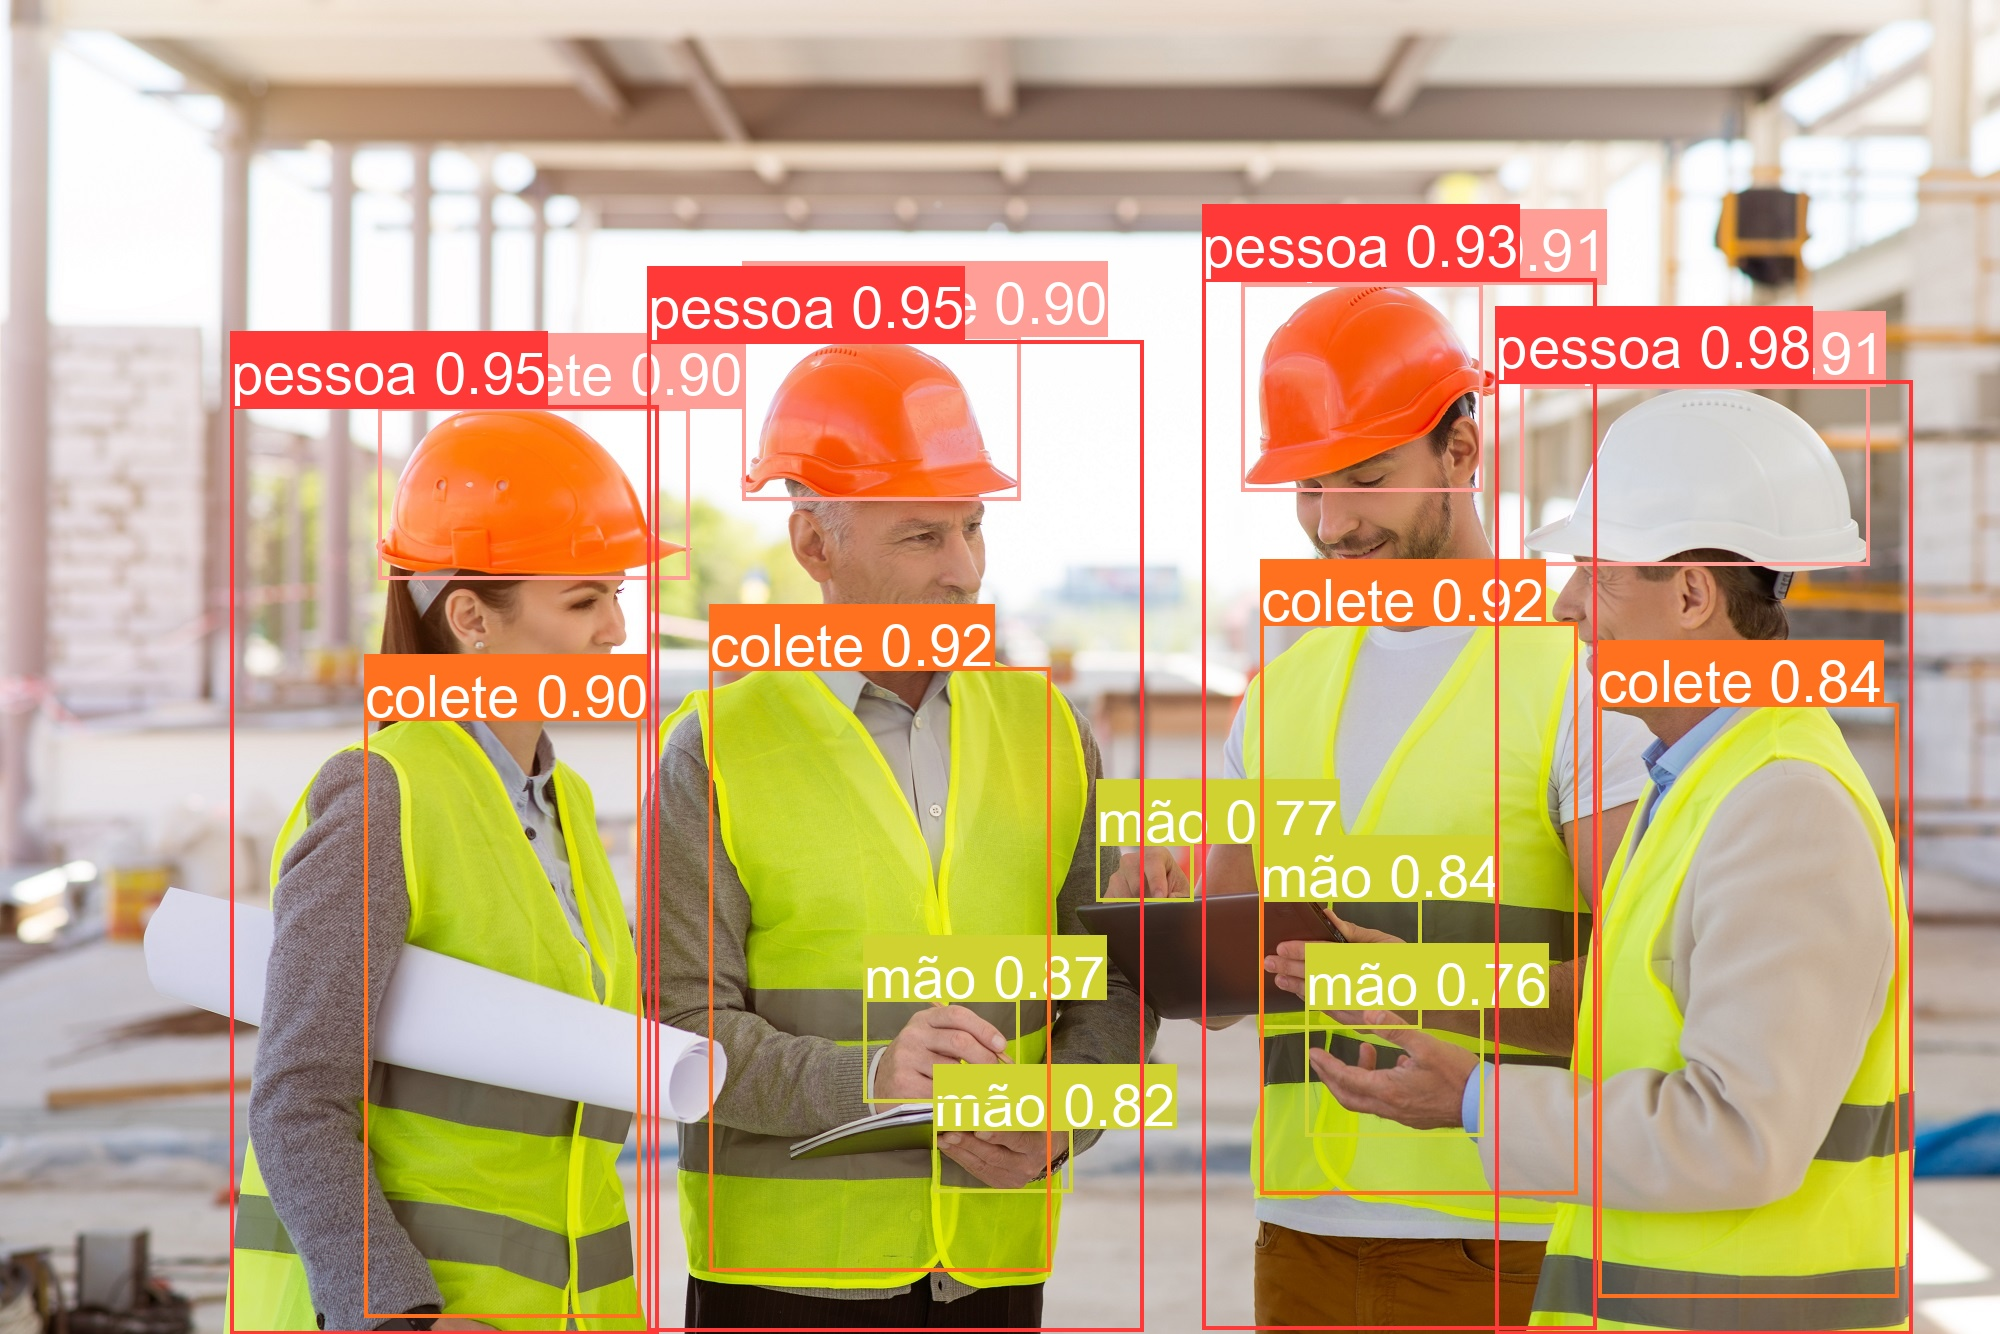

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/runs/detect/predict/Image_1.jpg')
cv2_imshow(img)

In [ ]:
infer.predict("/content/drive/MyDrive/ppe_contents/images_micka/construction-safety-training-video-over-40-topics (online-video-cutter.com).mp4", save=True, line_width=2, conf=0.5, save_txt=False, show_labels=True, show_conf=True, stream=False)

Para videos longos pode se usar a abordagem de percorrer o arquivo de predição, e ir mostrando as imagens, no nosso caso não foi necessário e o colab tem problemas para mostrar o resultado.

In [ ]:
results = infer.predict("/content/drive/MyDrive/ppe_contents/images_micka/teste.mp4", save=True, line_width=2, conf=0.5, save_txt=False, show_labels=True, show_conf=True, stream=True)  # generator of Results objects
for r in results:
    boxes = r.boxes  # Boxes object for bbox outputs
    masks = r.masks  # Masks object for segment masks outputs
    probs = r.probs  # Class probabilities for classification outputs

Para exportar o modelo treinado e utilizar a webcam,
Baixe o arquivo "best.pt" e utilize algo como o código a seguir:

from ultralytics import YOLO

model = YOLO("best.pt")

results = model(source=0, show=True, conf=0.3, save=True, vid_stride=True)